# CSPB 3202 - Final Project 

## Reinforcement Learning - Lunar Lander

### Table of Contents

1. Overview
2. Approach
3. Results
4. Conclusion
5. References

### Overview

In this project I'm going to be creating an agent to control the Lunar Lander Box2D environment from Gymnasium. The Lunar Lander environment can be referenced here: 

https://gymnasium.farama.org/environments/box2d/lunar_lander/

To begin I will implement a random agent to control the Lunar Lander. Then I will implement a heruistic agent. Finally I will implement a reinforcement learning model. 

#### Lunar Lander Environment Description

**Objective**

The objective of the Lunar Landar Environment is to land between the flags. 

**Action Space**

There are 4 actions that can be taken:

* 0: Do Nothing
* 1: Fire Left Engine
* 2: Fire Main Engine
* 3: Fire Right Engine

**Obervables**

Example obervable:

```Box([ -2.5 -2.5 -10. -10. -6.2831855 -10. -0. -0. ], [ 2.5 2.5 10. 10. 6.2831855 10. 1. 1. ], (8,), float32)```


|Definition|Value|
|:---------|:----|
|x coordinate|-2.5|
|y coordinate|-2.5|
|x linear velocity|-10|
|y linear velocity|-10|
|angle|-6.2831855|
|angular velocity|-10|
|leg one touchdown|0|
|leg two touchdown|0|

**Reward Criteria**

Each step the following items impact the reward.

- Distance from landing pad
- Movement speed
- Lander tilt
- Contact of each leg
- Number of times the engines are fired
- Landing safely

The total reward is the sum of all the rewards for all steps in the episode. OpenAI states that an episode is considered a solution of it scores at least 200 points. 

**Termination Criteria**

The episode is terminated if the lander crashes, it gets outside the viewpoint, or it's not active.


### Approach

To begin I'm going to start with the random agent. This will allow me to get my environment set up and have a good starting point for this project.

My project is organized as the following:

|File/Folder|Purpose|
|:---------|:----|
|franco_final_project.ipynb|A jupyter notebook containing my final project deliverables|
|scripts|A folder containing python scripts I have created|
|utils|A folder containing useful utilities I've created to assist with this assignemnt|
|ai_env.yml|An export of my conda environment. It can be imported on different machines. See README|
|assignment_definition|A folder containing project details given to us by the professor|
|gym_demos|A folder containing demos from the openAI gym website|






Running 4 episodes...
Saving vides to: lunarLander_random
Episode 2: 4 steps, reward = -85.29304963547672, success: False 
Episode 2: 4 steps, reward = -201.56496047743695, success: False 
Episode 2: 4 steps, reward = -86.90775362149446, success: False 
Episode 2: 4 steps, reward = -308.7667824840703, success: False 

Displaying gif from episode 1:


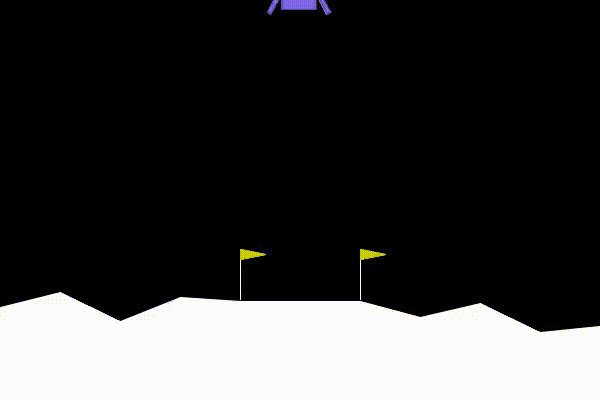

In [12]:
import gymnasium as gym
from gymnasium.wrappers import RecordEpisodeStatistics, RecordVideo
from IPython.display import Image

# Initialise the Lunar Lander Environment 
env = gym.make("LunarLander-v3", render_mode="rgb_array")
num_of_episodes = 4
folder="lunarLander_random"


# install env wrapper to record a video
env = RecordVideo(
    env,
    video_folder=folder,                  # Folder
    name_prefix="rand",                   # Video filename prefix
    episode_trigger=lambda x: True        # Record every episode
)

print(f"Running {num_of_episodes} episodes...")
print(f"Saving vides to: {folder}")

# Repeat for set number of episodes
for episode_count in range(num_of_episodes):
    # We need to reset the environment before first use
    observation, info = env.reset()

    # initialize total score to zero and step count
    total_score = 0
    num_of_steps = 0
    success_criteria = None

    episode_over = False

    while not episode_over:
        # For now we will use a random agent
        action = env.action_space.sample()

        # Take the random action and recieve information 
        observation, reward, terminated, truncated, info = env.step(action)
        total_score = total_score + reward

        num_of_steps += 1

        episode_over = terminated or truncated

    # The documentation states that a score of 200 or more is a solution
    success_criteria = reward >= 200
    print(f"Episode {episode_over + 1}: {num_of_episodes} steps, reward = {total_score}, success: {success_criteria} ")


env.close()

print("\nDisplaying gif from episode 1:")
Image(filename="lunarLander_random/rand-episode-0.gif")